In [2]:
%matplotlib inline
import matplotlib.animation as anim
from tqdm import tqdm
from time import sleep
import matplotlib.pyplot as plt
import numpy as np
import urllib.request


In [ ]:
#2.01
def factorial():
    n=1
    f=1
    to=[]
    for i in range(1,21):
        for j in range(1,i+1):
            f*=j
        to.append(f)
    
    return to

In [ ]:
factorial()

[1,
 2,
 12,
 288,
 34560,
 24883200,
 125411328000,
 5056584744960000,
 1834933472251084800000,
 6658606584104736522240000000,
 265790267296391946810949632000000000,
 127313963299399416749559771247411200000000000,
 792786697595796795607377086400871488552960000000000000,
 69113789582492712943486800506462734562847413501952000000000000000,
 90378331112371142262979521568630736335023247731599748366336000000000000000000,
 1890966832292234727042877370627225068196418587883634153182519380410368000000000000000000000,
 672593129192865130334217631473916658864122332882577979675277211683839238972899328000000000000000000000000,
 4306192564997715382115598640379294845786123319603755168023536027873932927153136831171640950784000000000000000000000000000,
 523827226948912906162136183269887782788685420217963126789982275317725639664591791615428617583779071590924288000000000000000000000000000000,
 1274420312381610764187232669591245728094053576480399681464607478621086015845192873311847341571189522511934190056

In [ ]:
2.02
def fibonacci():
    fib=[0,1]
    while len (fib)<20:
        fib.append(fib[len(fib)-2]+fib[len(fib)-1])
    return fib

In [ ]:
2.03
def aprox_aureo():
    x=fibonacci()
    aure=[]
    for i in range(1,len(x)-1):
        aure.append(x[i+1]/x[i])
    return aure

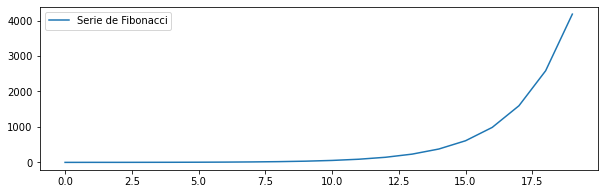

In [ ]:
fibonacci()
plt.plot(fibonacci(),label="Serie de Fibonacci")
leg = plt.legend()

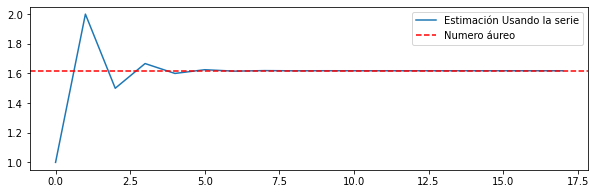

In [ ]:
plt.plot(aprox_aureo(),label="Estimación Usando la serie")
plt.axhline(y=(((np.sqrt(5)+1))/2),color='r',label="Numero áureo",linestyle='dashed',)
leg = plt.legend()

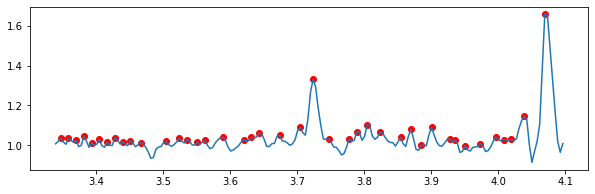

In [ ]:
url="https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/EstrellaEspectro.txt"
filename="DatosMaximo.txt"
urllib.request.urlretrieve(url,filename)
data=np.loadtxt(filename)
plt.plot(data[:,0],data[:,1])
mx=[]
my=[]
for i in range(0, len(data)-1):
    if data[i-1][1]<data[i][1] and data[i+1][1]<data[i][1]:
        mx.append(data[i][0])
        my.append(data[i][1])
plt.scatter(mx,my,color='r')

        
   







In [ ]:
#Raíces 3

def Function(x):
    return (3*x**5 + 5*x**4-x**3)

In [ ]:
x = np.linspace(-100,100,100)
y = Function(x)

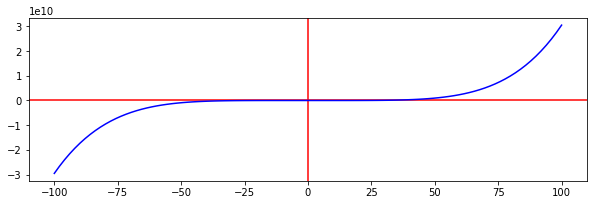

In [ ]:
plt.axhline(y=0,color='r')
plt.axvline(x=0,color='r')
plt.plot(x,y,color='b')

In [ ]:
def Derivative(f,x,h=1e-4):
    return (f(x+h)-f(x-h))/(2*h)


In [ ]:
def GetNewtonRaphson(f,df,xn,itmax = 100, precision=1e-5):
    
    error = 1
    it = 0
    
    while error > precision and it <= itmax:
        
        try:
            
            xn1 = xn - f(xn)/df(f,xn)
            
            error = np.abs(f(xn)/df(f,xn))
            
            #print(error)
            
        except ZeroDivisionError:
            
            print('Division por cero')
            
        it += 1
        xn = xn1
    
    if it == itmax:
        False
    else:
        return xn
        

In [ ]:
def GetAllRoots(x,tolerancia=10):
    
    Roots = np.array([])
    
    for i in x:
        
        root = GetNewtonRaphson(Function,Derivative,i)
        
        if root != False:
            
            croot = np.round(root, tolerancia)
            
            if croot not in Roots:
                Roots = np.append(Roots,croot)
                
                
    Roots.sort()
        
    return Roots

In [ ]:
x = np.linspace(-10,10,3)
Roots = GetAllRoots(x)


In [ ]:
Roots

array([-1.84712709,  0.18046042])

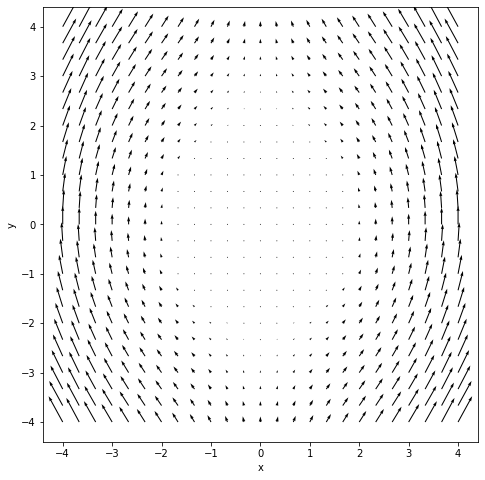

In [ ]:
#Derivación6

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-4, 4, 25)
y = np.linspace(-4, 4, 25)
X, Y = np.meshgrid(x, y)


R = 2
mask = np.sqrt((X ** 2) + (Y ** 2)) < R


v = 2


phi = v *X* (X ** 2 + Y ** 2 - R ** 2) / 2

h = 0.001
dphi_dx = np.gradient(phi, h, axis=1)
dphi_dy = np.gradient(phi, h, axis=0)

u = -dphi_dy
v = dphi_dx

u[mask] = 0
v[mask] = 0

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')
ax.quiver(X, Y, u, v)
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()


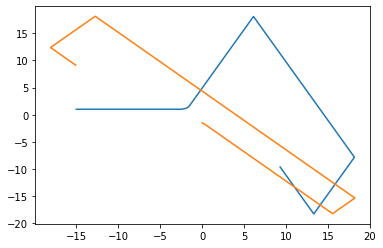

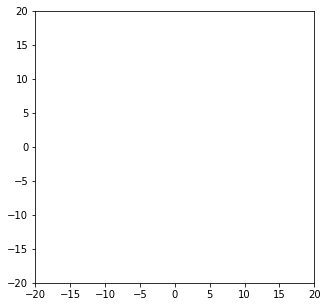

In [6]:
# 2.08
class Particle:
    def __init__(self,r0,v0,t,m=1,radius=2,Id=0):
        self.dt = t[1] - t[0]
        self.r = r0
        self.v = v0
        self.a = np.zeros(2)
        self.R = np.zeros((len(t),len(r0)))
        self.V = np.zeros_like(self.R)
        self.A = np.zeros_like(self.R)
        self.radius = radius
        self.Id = Id
        self.m = m
    def Evolution(self,i,Limits):
        self.R[i] = self.r
        self.V[i] = self.v
        self.CheckLimits(Limits)
        self.r += self.dt*self.v
        self.v += self.dt*self.a
        self.a *= 0
    def CheckLimits(self,Limits):
        for i in range(2):
            if self.r[i] + self.radius > Limits[i][1] and self.v[i] > 0.:
                self.v[i] = -1.0*self.v[i]
            if self.r[i] - self.radius < Limits[i][0] and self.v[i] < 0.:
                self.v[i] = -1.0*self.v[i]
    def SetForce(self,other):
      norm = np.linalg.norm(self.r-other.r)
      if (self.Id != other.Id) and (norm<(self.radius+other.radius)):
        self.a=K*norm**2*(self.r-other.r)/self.m

K=1
dt=0.05
T=np.arange(0,10,dt)
Limits = np.array([[-20.,20.],[-20.,20.]])
part1=Particle(np.array([-15.,1.]),np.array([10.,0.]),T,Id=1)
part2=Particle(np.array([0.,-1.5]),np.array([0.,0.]),T,Id=2)

for i in range(len(T)):
  part1.SetForce(part2)
  part2.SetForce(part1)
  part1.Evolution(i,Limits)
  part2.Evolution(i,Limits)

#prueba
plt.plot(*part1.R.T)
plt.plot(*part2.R.T)


scale = 1
T = T[::scale]
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

def init():
    ax.set_xlim(Limits[0][0],Limits[0][1])
    ax.set_ylim(Limits[1][0],Limits[1][1])
    
def Update(i):
    ax.clear()
    init()
    ax.set_title(r'$ t=%.2f \ s$' %(T[i]))
    for p in [part1,part2]:
        r = p.R[i]
        v = p.V[i]
        circle = plt.Circle(r,p.radius, fill=True, color='k')
        ax.add_patch(circle)
        ax.arrow(*r,*v,color='r',head_width=1,length_includes_head=True)
Animation = anim.FuncAnimation(fig,Update,frames=len(T),init_func=init)
Animation

In [7]:
Writer = anim.writers['ffmpeg']
fps = (1./dt) / scale
writer_ = Writer(fps=fps, metadata=dict(artist='Me'))
Animation.save('Particula.mp4', writer=writer_)